In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
c = df.isnull().sum()

# Mengonversi hasil ke dalam string
null_counts = c.to_string()

# Membuat teks untuk disimpan
result_text = f"Jumlah nilai null di setiap kolom:\n{null_counts}"

# Menyimpan hasil ke dalam file hasil.txt
with open('hasil.txt', 'w') as file:
    file.write(result_text)

print("Hasil telah disimpan ke dalam 'hasil.txt'")

Hasil telah disimpan ke dalam 'hasil.txt'


In [4]:
threshold = 1e6
for column in df.select_dtypes(include=[np.float64]):
    max_value = df[column].max()
    if max_value > threshold:
        print(f"Kolom '{column}' memiliki nilai maksimum {max_value:.2f}, yang melebihi ambang batas {threshold}")
    else:
        print(f"Kolom '{column}' memiliki nilai maksimum {max_value:.2f}, di bawah ambang batas {threshold}")

Kolom ' Fwd Packet Length Mean' memiliki nilai maksimum 3867.00, di bawah ambang batas 1000000.0
Kolom ' Fwd Packet Length Std' memiliki nilai maksimum 6692.64, di bawah ambang batas 1000000.0
Kolom ' Bwd Packet Length Mean' memiliki nilai maksimum 5800.50, di bawah ambang batas 1000000.0
Kolom ' Bwd Packet Length Std' memiliki nilai maksimum 8194.66, di bawah ambang batas 1000000.0
Kolom 'Flow Bytes/s' memiliki nilai maksimum inf, yang melebihi ambang batas 1000000.0
Kolom ' Flow Packets/s' memiliki nilai maksimum inf, yang melebihi ambang batas 1000000.0
Kolom ' Flow IAT Mean' memiliki nilai maksimum 107000000.00, yang melebihi ambang batas 1000000.0
Kolom ' Flow IAT Std' memiliki nilai maksimum 69200000.00, yang melebihi ambang batas 1000000.0
Kolom ' Fwd IAT Mean' memiliki nilai maksimum 120000000.00, yang melebihi ambang batas 1000000.0
Kolom ' Fwd IAT Std' memiliki nilai maksimum 76700000.00, yang melebihi ambang batas 1000000.0
Kolom ' Bwd IAT Mean' memiliki nilai maksimum 12000

In [5]:
from sklearn.preprocessing import StandardScaler

# Misalkan df adalah DataFrame Anda

# Ambang batas untuk mendeteksi kolom yang memiliki nilai besar
threshold = 1e6

# Buat objek StandardScaler
scaler = StandardScaler()

# Cari kolom yang memiliki nilai maksimum melebihi ambang batas
for column in df.select_dtypes(include=[np.float64]):
    max_value = df[column].max()
    if max_value > threshold:
        # Ganti nilai inf dan NaN dengan nilai maksimum kolom
        df[column].replace([np.inf, -np.inf], np.nan, inplace=True)  # Ganti inf dengan NaN
        df[column].fillna(df[column].max(), inplace=True)  # Ganti NaN dengan nilai maksimum
        
        # Terapkan StandardScaler pada kolom tersebut
        df[[column]] = scaler.fit_transform(df[[column]])
        print(f"Kolom '{column}' telah di-standardisasi.")
    else:
        print(f"Kolom '{column}' tidak memerlukan standardisasi.")

Kolom ' Fwd Packet Length Mean' tidak memerlukan standardisasi.
Kolom ' Fwd Packet Length Std' tidak memerlukan standardisasi.
Kolom ' Bwd Packet Length Mean' tidak memerlukan standardisasi.
Kolom ' Bwd Packet Length Std' tidak memerlukan standardisasi.
Kolom 'Flow Bytes/s' telah di-standardisasi.
Kolom ' Flow Packets/s' telah di-standardisasi.
Kolom ' Flow IAT Mean' telah di-standardisasi.
Kolom ' Flow IAT Std' telah di-standardisasi.
Kolom ' Fwd IAT Mean' telah di-standardisasi.
Kolom ' Fwd IAT Std' telah di-standardisasi.
Kolom ' Bwd IAT Mean' telah di-standardisasi.
Kolom ' Bwd IAT Std' telah di-standardisasi.
Kolom 'Fwd Packets/s' telah di-standardisasi.
Kolom ' Bwd Packets/s' telah di-standardisasi.
Kolom ' Packet Length Mean' tidak memerlukan standardisasi.
Kolom ' Packet Length Std' tidak memerlukan standardisasi.
Kolom ' Packet Length Variance' telah di-standardisasi.
Kolom ' Average Packet Size' tidak memerlukan standardisasi.
Kolom ' Avg Fwd Segment Size' tidak memerlukan st

C:\Users\USER\AppData\Local\Temp\ipykernel_14220\3773339877.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace([np.inf, -np.inf], np.nan, inplace=True)  # Ganti inf dengan NaN
C:\Users\USER\AppData\Local\Temp\ipykernel_14220\3773339877.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [6]:
c = df.isnull().sum()

# Mengonversi hasil ke dalam string
null_counts = c.to_string()

# Membuat teks untuk disimpan
result_text = f"Jumlah nilai null di setiap kolom:\n{null_counts}"

# Menyimpan hasil ke dalam file hasil.txt
with open('hasil1.txt', 'w') as file:
    file.write(result_text)

print("Hasil telah disimpan ke dalam 'hasil.txt'")

Hasil telah disimpan ke dalam 'hasil.txt'


In [28]:
import joblib

In [29]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])
l = df[' Label'].unique()
print(l)

[0 1]


In [10]:
X = df.drop(' Label', axis=1)  # Gantilah 'target' dengan nama kolom target Anda
y = df[' Label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


Fitur penting berdasarkan Random Forest:
                    feature  importance
6     Fwd Packet Length Max    0.088554
66   Init_Win_bytes_forward    0.075439
8    Fwd Packet Length Mean    0.075417
53     Avg Fwd Segment Size    0.074162
63        Subflow Fwd Bytes    0.055813
..                      ...         ...
59       Bwd Avg Bytes/Bulk    0.000000
58        Fwd Avg Bulk Rate    0.000000
57     Fwd Avg Packets/Bulk    0.000000
56       Fwd Avg Bytes/Bulk    0.000000
50           ECE Flag Count    0.000000

[78 rows x 2 columns]


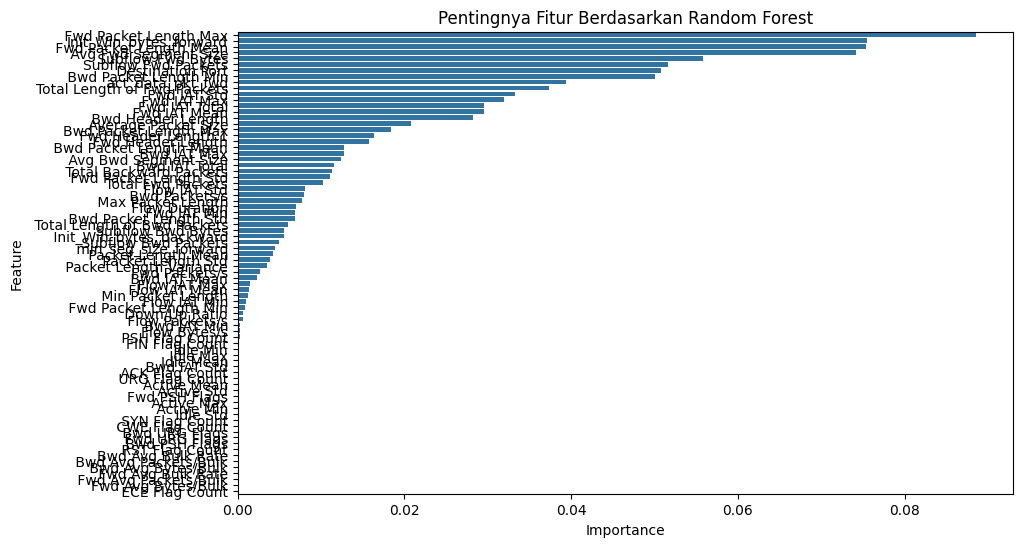

Top 10 fitur yang disarankan: [' Fwd Packet Length Max' 'Init_Win_bytes_forward'
 ' Fwd Packet Length Mean' ' Avg Fwd Segment Size' ' Subflow Fwd Bytes'
 'Subflow Fwd Packets' ' Destination Port' ' Bwd Packet Length Min'
 ' act_data_pkt_fwd' 'Total Length of Fwd Packets']


In [15]:
print("Fitur penting berdasarkan Random Forest:")
print(feature_importances)

# Plot fitur penting
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Pentingnya Fitur Berdasarkan Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Memilih fitur dengan nilai importance tertinggi (misalnya top 10)
top_features = feature_importances.head(10)['feature'].values
print("Top 10 fitur yang disarankan:", top_features)

In [16]:
df = df[[' Fwd Packet Length Max', 'Init_Win_bytes_forward', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Subflow Fwd Bytes', 'Subflow Fwd Packets', ' Destination Port', ' Bwd Packet Length Min', ' act_data_pkt_fwd', 'Total Length of Fwd Packets', ' Label']]
df.head()

,Fwd Packet Length Max,Init_Win_bytes_forward,Fwd Packet Length Mean,Avg Fwd Segment Size,Subflow Fwd Bytes,Subflow Fwd Packets,Destination Port,Bwd Packet Length Min,act_data_pkt_fwd,Total Length of Fwd Packets,Label
0,6,33,6.0,6.0,12,2,54865,0,1,12,0
1,6,29,6.0,6.0,6,1,55054,6,0,6,0
2,6,29,6.0,6.0,6,1,55055,6,0,6,0
3,6,31,6.0,6.0,6,1,46236,6,0,6,0
4,6,32,6.0,6.0,12,2,54863,0,1,12,0


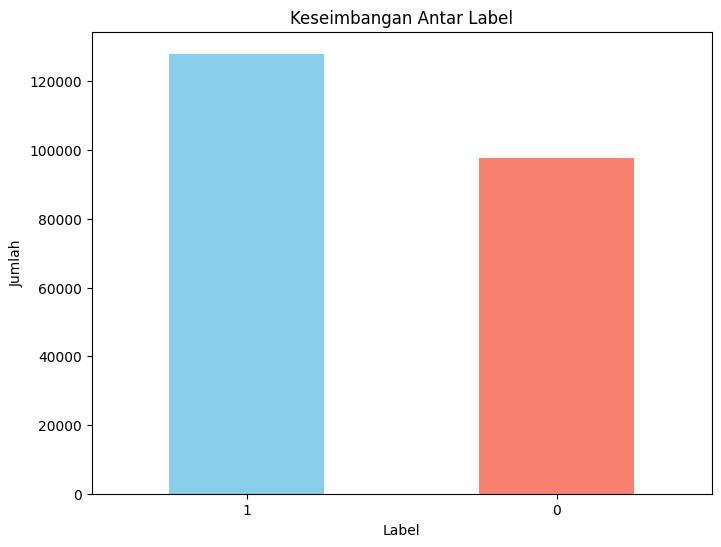

In [17]:
label_counts = df[' Label'].value_counts()
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Keseimbangan Antar Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [18]:
print(label_counts)

 Label
1    128027
0     97718
Name: count, dtype: int64


In [19]:
data_label_0 = df[df[' Label'] == 0]
data_label_4 = df[df[' Label'] == 1]

# Undersampling ke 23.000 data untuk tiap label
sampled_label_0 = data_label_0.sample(n=97000, random_state=42)
sampled_label_4 = data_label_4.sample(n=97000, random_state=42)

# Gabungkan kembali data
balanced_df = pd.concat([sampled_label_0, sampled_label_4])
df = balanced_df.reset_index(drop=True)

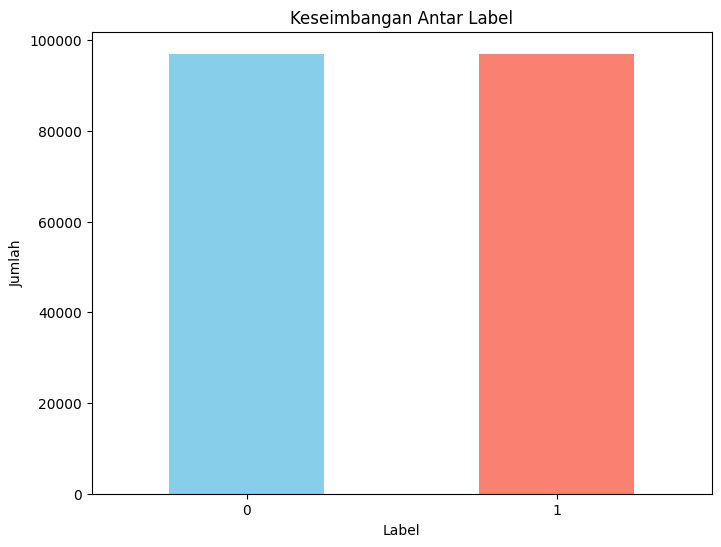

In [20]:
label_counts = df[' Label'].value_counts()
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Keseimbangan Antar Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [21]:
v = df.to_csv('train1.csv')
v

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [49]:
X = df.drop(' Label', axis=1)  # Gantilah 'target' dengan nama kolom target Anda
y = df[' Label']

In [51]:
X_scaled = scaler.fit_transform(X)

In [53]:
X_reshaped = X_scaled.reshape((X.shape[0], 1, X_scaled.shape[1]))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

In [55]:
model = Sequential()
model.add(LSTM(65, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

e:\AI_Projek\Net_Detected\bakso2\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=80, batch_size=64, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9171 - loss: 0.2226 - val_accuracy: 0.9915 - val_loss: 0.0404
Epoch 2/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9928 - loss: 0.0364 - val_accuracy: 0.9925 - val_loss: 0.0379
Epoch 3/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0331 - val_accuracy: 0.9926 - val_loss: 0.0363
Epoch 4/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9934 - loss: 0.0326 - val_accuracy: 0.9924 - val_loss: 0.0366
Epoch 5/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0339 - val_accuracy: 0.9927 - val_loss: 0.0348
Epoch 6/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0323 - val_accuracy: 0.9927 - val_loss: 0.0346
Epoch 7/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0311 - val_accuracy: 0.9927 - val_loss: 0.0345
Epoch 8/80
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0320 - 

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)

# Menggunakan threshold 0.5 untuk binarize hasil prediksi
predictions_binary = (predictions > 0.5).astype(int)

# Menghitung classification report
print("Classification Report:")
print(classification_report(y_test, predictions_binary))

# Menghitung confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))

1819/1819 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29002
           1       1.00      1.00      1.00     29198

    accuracy                           1.00     58200
   macro avg       1.00      1.00      1.00     58200
weighted avg       1.00      1.00      1.00     58200

Confusion Matrix:
[[28980    22]
 [   43 29155]]
